Statevector after initialization: Statevector([0.48+0.j, 0.  +0.j, 0.64+0.j, 0.  +0.j, 0.36+0.j, 0.  +0.j,
             0.48+0.j, 0.  +0.j],
            dims=(2, 2, 2))


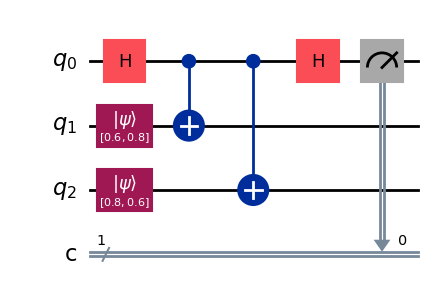

In [45]:
# # koordinat 2 titik
# a = [0.6, 0.8]
# b = [0.8,0.6]

# from qiskit.quantum_info import Statevector
# from qiskit import QuantumCircuit

# # inisialisasi untuk quantum state a
# sv_a = Statevector(a)
# qc_a = QuantumCircuit(1)
# qc_a.initialize(sv_a,0)

# # inisialisasi untuk quantum state a
# sv_b = Statevector(b)
# qc_b = QuantumCircuit(1)
# qc_b.initialize(sv_b, 0)

# # kombinasi dan inner product menggunakan hadamart test
# qc = QuantumCircuit(2)
# qc.initialize(sv_a.data, 0)
# qc.initialize(sv_b.data, 1)
# qc.h(0)
# qc.cx(0,1)
# qc.h(0)
# qc.measure_all()

# qc.draw("mpl")


# Metode ke 2
from qiskit import QuantumCircuit

# Quantum states
a = [0.6, 0.8]
b = [0.8, 0.6]

# Circuit for Hadamard test
qc = QuantumCircuit(3, 1)  # 1 ancilla + 2 qubits for |a> and |b>, 1 classical bit for ancilla measurement

# Initialize |a> and |b>
qc.initialize(a, 1)  # Qubit 1: |a>
qc.initialize(b, 2)  # Qubit 2: |b>

from qiskit.quantum_info import Statevector

# Statevector after initialization
sv = Statevector.from_instruction(qc)
print("Statevector after initialization:", sv)


# Hadamard test
qc.h(0)             # Hadamard on ancilla
qc.cx(0, 1)         # Controlled operation on |a>
qc.cx(0, 2)         # Controlled operation on |b>
qc.h(0)             # Hadamard on ancilla again

# Measure ancilla
qc.measure(0, 0)    # Measure only ancilla (qubit 0)

# Visualize the circuit
qc.draw("mpl")



In [ ]:
#simulasi
#m membuat simulator
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()

from qiskit import transpile
new = transpile(qc, aer_sim)

job = aer_sim.run(new)

# mengecek hasil
result = job.result()
counts = result.get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts)



QiskitError: 'No statevector for experiment "None"'

In [39]:
# # hitung probabilitas 
# p0 = counts.get('00', 0)/100000
# p1 = counts.get('10', 0)/100000

# inner_product = 2 * (p0-p1)
# inner_product

# metode 2
p0 = counts.get('0', 0) / sum(counts.values())
p1 = counts.get('1', 0) / sum(counts.values())

# Estimate the real part of the inner product
inner_product = 2 * (p0 - p1)
inner_product

1.8359375

In [42]:
print(f"Counts: {counts}")
print(f"Probabilitas: P(0) = {p0}, P(1) = {p1}")
print(f"Estimasi Inner Product (Real): {inner_product}")

Counts: {'0': 982, '1': 42}
Probabilitas: P(0) = 0.958984375, P(1) = 0.041015625
Estimasi Inner Product (Real): 1.8359375
